In [2]:
import numpy as np
import matplotlib.pyplot as plt
import powerlaw
from scipy.special import zetac
from mpmath import zeta 
from matplotlib.lines import Line2D
def plot_loglog(ax, tot_clust):
    x = np.linspace(1, len(tot_clust), (len(tot_clust)))
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.plot(x, tot_clust)
    ax.plot(x, tot_clust, '+')

def plot_samplex(ax, clusters):
    list = np.zeros(len(clusters))
    for i in range(len(clusters)):
        list[i] = np.sum(clusters[i:])/np.sum(clusters)
    ax.set_xscale('log')
    ax.set_yscale('log')
    x = np.linspace(1, len(list), len(list))
    ax.plot(x, list)
    return x, list

def plot_ccdf1(ax, tot_clust):
    N = len(tot_clust)
    x = np.sort(tot_clust) 
    y = np.arange(N) / float(N)
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.plot(x, 1-y)

def plot_ccdf2(ax, tot_clust, dens=False):
    count, bins_count = np.histogram(tot_clust, bins=np.logspace(0, np.log10(len(tot_clust)), 5000), density=dens)
    pdf = count / sum(count) 
    cdf = np.cumsum(pdf)
    ccdf = 1 - cdf
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.plot(bins_count[1:], ccdf)
    return bins_count[1:], ccdf

def pl(x, a, b):
    return a * np.power(x, -b)

def fit_pl(x, y):
    return scipy.optimize.curve_fit(power_law, x, y)

def calc_alpha(amount, size, xmin, xmax):
    alpha = 1 + len(amount[xmin:xmax]) / (np.sum(np.log(amount[xmin:xmax]/ (np.min(amount[xmin:xmax]) - 0.5))))
    xmin2 = size[xmin]
    invSigma = np.sqrt(len(amount[xmin:xmax]) * ( (zeta(alpha, xmin2, 2)/zeta(alpha, xmin2)) - (zeta(alpha, xmin2, 1)/zeta(alpha,xmin2))**2 ))
    sigma = 1/invSigma
    return [alpha, sigma]



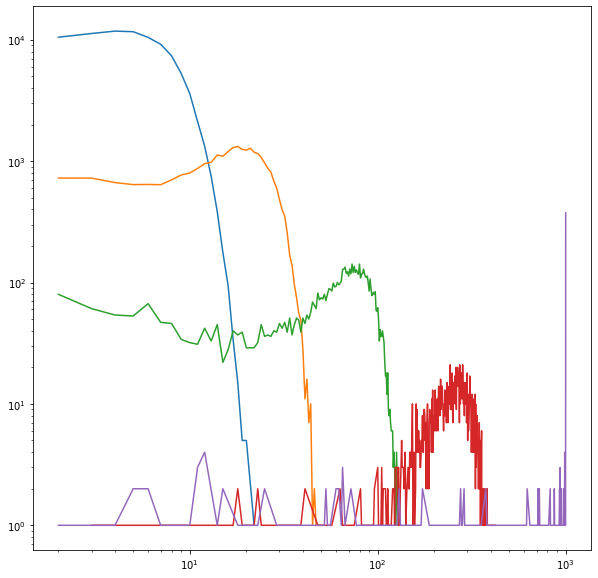

In [16]:
plt.figure(figsize=(10, 10))
size, amount = np.loadtxt("Pref_growth/2D/2D_c0.00_r5.000000_0.100000_0.txt", skiprows=1, unpack=True)
size = size[1:]
amount = amount[1:]
plt.loglog(size, amount)

size, amount = np.loadtxt("Pref_growth/2D/2D_c0.00_r10.000000_0.100000_0.txt", skiprows=1, unpack=True)
size = size[1:]
amount = amount[1:]
plt.loglog(size, amount)

size, amount = np.loadtxt("Pref_growth/2D/2D_c0.00_r20.000000_0.100000_0.txt", skiprows=1, unpack=True)
size = size[1:]
amount = amount[1:]
plt.loglog(size, amount)

size, amount = np.loadtxt("Pref_growth/2D/2D_c0.00_r40.000000_0.100000_0.txt", skiprows=1, unpack=True)
size = size[1:]
amount = amount[1:]
plt.loglog(size, amount)

size, amount = np.loadtxt("Pref_growth/2D/2D_c0.00_r80.000000_0.100000_0.txt", skiprows=1, unpack=True)
size = size[1:]
amount = amount[1:]
plt.loglog(size, amount)


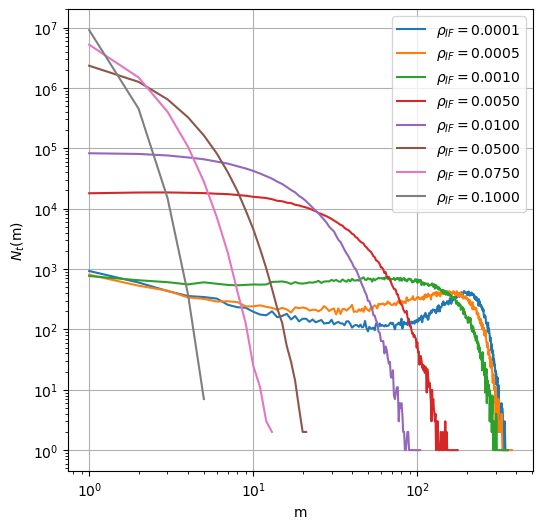

In [3]:
plt.figure(figsize=(6, 6))
size, amount = np.loadtxt("Pref_growth/3D_c0.00_r10.000000_0.100000_1_0.0001.txt", skiprows=1, unpack=True)
size = size
amount = amount
plt.loglog(size, amount, label=r'$\rho_{IF}=0.0001$')

size, amount = np.loadtxt("Pref_growth/3D_c0.00_r10.000000_0.100000_1_0.0005.txt", skiprows=1, unpack=True)
size = size
amount = amount
plt.loglog(size, amount, label=r'$\rho_{IF}=0.0005$')

size, amount = np.loadtxt("Pref_growth/3D_c0.00_r10.000000_0.100000_1_0.0010.txt", skiprows=1, unpack=True)
size = size
amount = amount
plt.loglog(size, amount, label=r'$\rho_{IF}=0.0010$')

size, amount = np.loadtxt("Pref_growth/3D_c0.00_r10.000000_0.100000_1_0.0050.txt", skiprows=1, unpack=True)
size = size
amount = amount
plt.loglog(size, amount, label=r'$\rho_{IF}=0.0050$')

size, amount = np.loadtxt("Pref_growth/3D_c0.00_r10.000000_0.100000_1_0.0100.txt", skiprows=1, unpack=True)
size = size
amount = amount
plt.loglog(size, amount, label=r'$\rho_{IF}=0.0100$')

size, amount = np.loadtxt("Pref_growth/3D_c0.00_r10.000000_0.100000_1_0.0500.txt", skiprows=1, unpack=True)
size = size
amount = amount
plt.loglog(size, amount, label=r'$\rho_{IF}=0.0500$')

size, amount = np.loadtxt("Pref_growth/3D_c0.00_r10.000000_0.100000_1_0.0750.txt", skiprows=1, unpack=True)
size = size
amount = amount
plt.loglog(size, amount, label=r'$\rho_{IF}=0.0750$')


size, amount = np.loadtxt("Pref_growth/3D_c0.00_r10.000000_0.100000_1_0.1000.txt", skiprows=1, unpack=True)
size = size
amount = amount
plt.loglog(size, amount, label=r'$\rho_{IF}=0.1000$')

plt.grid()
plt.xlabel("m")
plt.ylabel(r"$N_t$(m)")
plt.legend()
plt.savefig("finalplot/growth_background.jpeg", bbox_inches='tight', pad_inches=0.2)



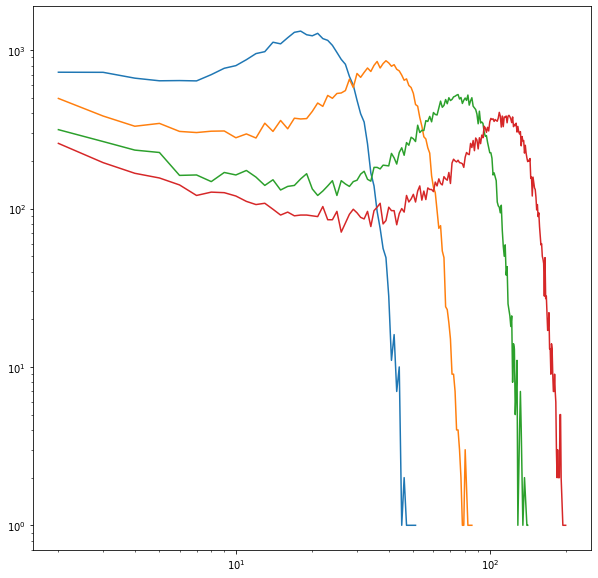

In [17]:
plt.figure(figsize=(10, 10))

size, amount = np.loadtxt("Pref_growth/2D/2D_c0.00_r10.000000_0.100000_0.txt", skiprows=1, unpack=True)
size = size[1:]
amount = amount[1:]
plt.loglog(size, amount)


size, amount = np.loadtxt("Pref_growth/2D/2D_c0.00_r10.000000_0.200000_0.txt", skiprows=1, unpack=True)
size = size[1:]
amount = amount[1:]
plt.loglog(size, amount)


size, amount = np.loadtxt("Pref_growth/2D/2D_c0.00_r10.000000_0.400000_0.txt", skiprows=1, unpack=True)
size = size[1:]
amount = amount[1:]
plt.loglog(size, amount)


size, amount = np.loadtxt("Pref_growth/2D/2D_c0.00_r10.000000_0.600000_0.txt", skiprows=1, unpack=True)
size = size[1:]
amount = amount[1:]
plt.loglog(size, amount)

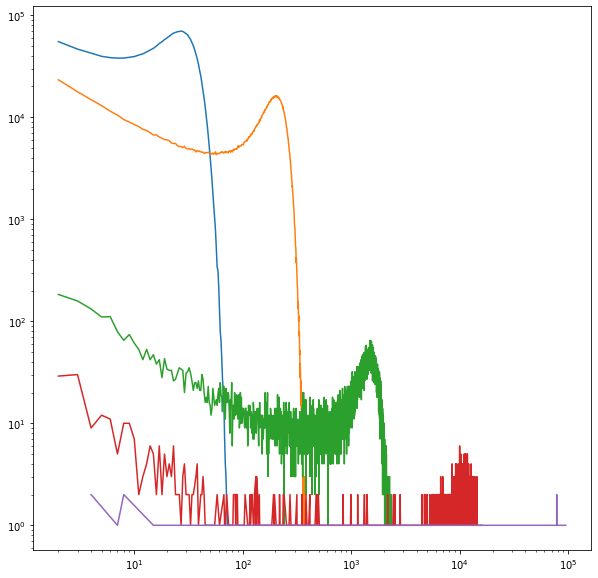

In [18]:
plt.figure(figsize=(10, 10))

size, amount = np.loadtxt("Pref_growth/3D/3D_c0.00_r5.000000_0.100000_0.txt", skiprows=1, unpack=True)
size = size[1:]
amount = amount[1:]
plt.loglog(size, amount)


size, amount = np.loadtxt("Pref_growth/3D/3D_c0.00_r10.000000_0.100000_0.txt", skiprows=1, unpack=True)
size = size[1:]
amount = amount[1:]
plt.loglog(size, amount)


size, amount = np.loadtxt("Pref_growth/3D/3D_c0.00_r20.000000_0.100000_0.txt", skiprows=1, unpack=True)
size = size[1:]
amount = amount[1:]
plt.loglog(size, amount)


size, amount = np.loadtxt("Pref_growth/3D/3D_c0.00_r40.000000_0.100000_0.txt", skiprows=1, unpack=True)
size = size[1:]
amount = amount[1:]
plt.loglog(size, amount)


size, amount = np.loadtxt("Pref_growth/3D/3D_c0.00_r80.000000_0.100000_0.txt", skiprows=1, unpack=True)
size = size[1:]
amount = amount[1:]
plt.loglog(size, amount)

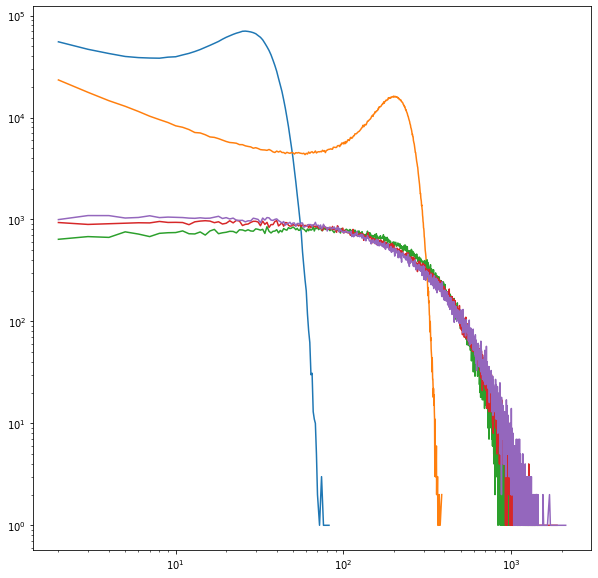

In [19]:
plt.figure(figsize=(10, 10))

size, amount = np.loadtxt("Pref_growth/3D/3D_c0.00_r5.000000_0.100000_1.txt", skiprows=1, unpack=True)
size = size[1:]
amount = amount[1:]
plt.loglog(size, amount)

size, amount = np.loadtxt("Pref_growth/3D/3D_c0.00_r10.000000_0.100000_1.txt", skiprows=1, unpack=True)
size = size[1:]
amount = amount[1:]
plt.loglog(size, amount)

size, amount = np.loadtxt("Pref_growth/3D/3D_c0.00_r20.000000_0.100000_1.txt", skiprows=1, unpack=True)
size = size[1:]
amount = amount[1:]
plt.loglog(size, amount)

size, amount = np.loadtxt("Pref_growth/3D/3D_c0.00_r40.000000_0.100000_1.txt", skiprows=1, unpack=True)
size = size[1:]
amount = amount[1:]
plt.loglog(size, amount)

size, amount = np.loadtxt("Pref_growth/3D/3D_c0.00_r80.000000_0.100000_1.txt", skiprows=1, unpack=True)
size = size[1:]
amount = amount[1:]
plt.loglog(size, amount)

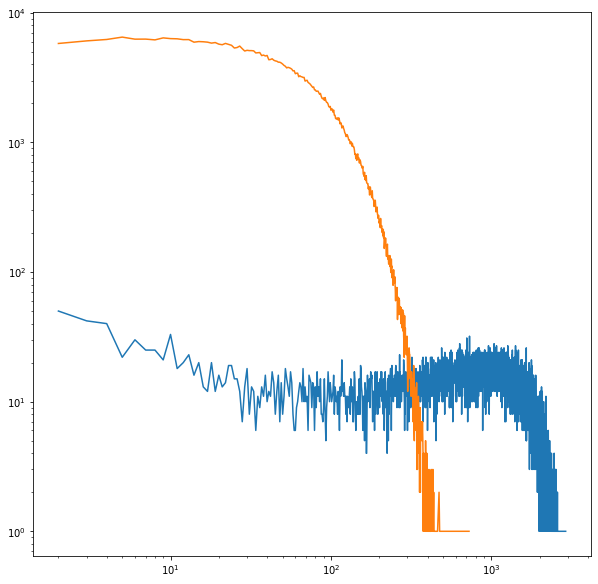

In [20]:
plt.figure(figsize=(10, 10))

size, amount = np.loadtxt("Pref_growth/3D/3D_c0.00_r15.000000_0.300000_1.txt", skiprows=1, unpack=True)
size = size[1:]
amount = amount[1:]
plt.loglog(size, amount)

size, amount = np.loadtxt("Pref_growth/3D/3D_c0.00_r15.000000_0.300000_1_5000.txt", skiprows=1, unpack=True)
size = size[1:]
amount = amount[1:]
plt.loglog(size, amount)
